## Loading of data

In [1]:
import classyRF
import numpy as np
import matplotlib.pyplot as plt
import classyRF

C:\Users\marin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [9]:
import importlib
importlib.reload(classyRF)

<module 'classyRF' from 'C:\\Users\\marin\\Desktop\\ML_workingGroup\\classy_RF\\classyRF.py'>

In [2]:
path = "C:\\Users\\marin\\Desktop\\ML_workingGroup\\NS_dataset_NOPUBLIC\\"

In [10]:
#Recover last session
RF = classyRF.ClassificationRF()
RF.loadModel(path, 'ind_rec_crossvalidated')

loading  C:\Users\marin\Desktop\ML_workingGroup\NS_dataset_NOPUBLIC\ind_rec_crossvalidated.joblib


In [11]:
i_m1i=1; i_m2i=2; i_x1i=3; i_x2i=4; i_mci=5; i_qi=6; i_Ri=7; i_Ci=8; 
i_m1r=9; i_m2r=10; i_x1r=11; i_x2r=12; i_mcr=13; i_qr=15; i_Rr=16; i_Cr=17;
i_snr=18;
injected_index = [i_m1i, i_m2i, i_x1i, i_x2i, i_mci, i_qi, i_Ri, i_Ci, i_snr]
recovered_index = [i_m1r, i_m2r, i_x1r, i_x2r, i_mcr, i_qr, i_Rr, i_Cr, i_snr]
independent_injected_index = [i_m1i, i_m2i, i_x1i, i_x2i, i_snr]
independent_recovered_index = [i_m1r, i_m2r, i_x1r, i_x2r, i_snr]

In [12]:
RF.load_train_dataset(path, fname_x='train_NS.csv')
RF.load_test_dataset(path, fname_x='test_NS.csv')
RF.subset_features(independent_recovered_index)

Training and testing using:
m1_rec
m2_rec
chi1_rec
chi2_rec
snr


In [14]:
RF.compute_metrics()

In [42]:
predRF = RF.test_prediction
probRF = RF.metric_dic["prob"][:,1]

In [18]:
labelsReal = RF.labels_test

In [19]:
Miquel = classyRF.extractData(path+"KNN_predictions_prob_NS.csv")

In [20]:
predKNN = Miquel[:,1]
probKNN = Miquel[:,2]

The probability vectors contain the probability of saying the event is category 1

## Compute scores

In [33]:
Nevents = len(labelsReal)
total1_real= np.count_nonzero(labelsReal)
total0_real= Nevents - total1_real

total1_RF = np.count_nonzero(predRF)
total0_RF = Nevents - np.count_nonzero(predRF)

total1_KNN = np.count_nonzero(predKNN)
total0_KNN = Nevents - np.count_nonzero(predKNN)

print("Total events in the test: ",Nevents)
print(total1_real," are 1 ({:.3f}".format(total1_real/Nevents), "%), ",total0_real, "are 0 ({:.3f}".format(total0_real/Nevents),"%)")
print("RF predicts:")
print(total1_RF," are 1 ({:.3f}".format(total1_RF/Nevents), "%), ",total0_RF, "are 0 ({:.3f}".format(total0_RF/Nevents),"%)")
print("KNN predicts:")
print(total1_KNN," are 1 ({:.3f}".format(total1_KNN/Nevents), "%), ",total0_KNN, "are 0 ({:.3f}".format(total0_KNN/Nevents),"%)")


Total events in the test:  59999
41710  are 1 (0.695 %),  18289 are 0 (0.305 %)
RF predicts:
41969  are 1 (0.699 %),  18030 are 0 (0.301 %)
KNN predicts:
42143  are 1 (0.702 %),  17856 are 0 (0.298 %)


So KNN overpredicts category 1 more than RF

In [35]:
good0RF=0; good1RF=0; good0KNN=0; good1KNN=0;
for i in range(0,len(labelsReal)):
    if labelsReal[i]==0:
        if predRF[i]==0:
            good0RF=good0RF+1
        if predKNN[i]==0:
            good0KNN=good0KNN+1
    if labelsReal[i]==1:
        if predRF[i]==1:
            good1RF=good1RF+1
        if predKNN[i]==1:
            good1KNN=good1KNN+1   

In [38]:
print("RF:")
print("Predicts correctly {:.3f}".format(good0RF/total0_real),"% of zeros, {:.5f}".format(good1RF/total1_real),"% of ones. Score: {:.5f}".format((good0RF+good1RF)/Nevents))
print("KNN:")
print("Predicts correctly {:.3f}".format(good0KNN/total0_real),"% of zeros, {:.5f}".format(good1KNN/total1_real),"% of ones. Score: {:.5f}".format((good0KNN+good1KNN)/Nevents))

RF:
Predicts correctly 0.952 % of zeros, 0.98497 % of ones. Score: 0.97478
KNN:
Predicts correctly 0.943 % of zeros, 0.98533 % of ones. Score: 0.97238


## Probabilities:
### When choosing wrong, what was the probability of the correct answer?

In [43]:
RFprobIs0=[]; RFprobIs1=[]; KNNprobIs0=[]; KNNprobIs1=[]; 
for i in range(0,len(labelsReal)):
    if labelsReal[i]==0:
        if predRF[i]==1:
            RFprobIs0.append(1-probRF[i])
        if predKNN[i]==1:
            KNNprobIs0.append(1-probKNN[i])
    if labelsReal[i]==1:
        if predRF[i]==0:
            RFprobIs1.append(probRF[i])
        if predKNN[i]==0:
            KNNprobIs1.append(probKNN[i]) 

When the method is wrong:


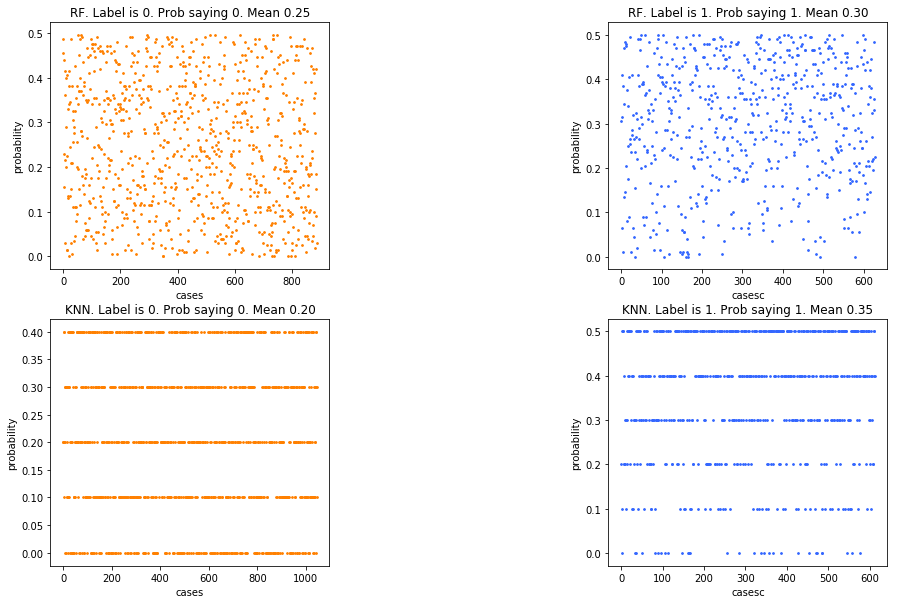

In [66]:
print("When the method is wrong:")
fig, axs = plt.subplots(2,2, figsize=(15, 10))
axs[0][0].scatter(np.linspace(0,len(RFprobIs0),len(RFprobIs0)),RFprobIs0, color=[1,0.5,0], s=3)
axs[0][0].set_xlabel('cases')
axs[0][0].set_ylabel('probability')
axs[0][0].set_title("RF. Label is 0. Prob saying 0. Mean {:.2f}".format(np.mean(RFprobIs0)))
axs[0][1].scatter(np.linspace(0,len(RFprobIs1),len(RFprobIs1)),RFprobIs1, color=[0.2,0.4,1], s=3)
axs[0][1].set_xlabel('casesc')
axs[0][1].set_ylabel('probability')
axs[0][1].set_title("RF. Label is 1. Prob saying 1. Mean {:.2f}".format(np.mean(RFprobIs1)))
axs[1][0].scatter(np.linspace(0,len(KNNprobIs0),len(KNNprobIs0)),KNNprobIs0, color=[1,0.5,0], s=3)
axs[1][0].set_xlabel('cases')
axs[1][0].set_ylabel('probability')
axs[1][0].set_title("KNN. Label is 0. Prob saying 0. Mean {:.2f}".format(np.mean(KNNprobIs0)))
axs[1][1].scatter(np.linspace(0,len(KNNprobIs1),len(KNNprobIs1)),KNNprobIs1, color=[0.2,0.4,1], s=3)
axs[1][1].set_xlabel('casesc')
axs[1][1].set_ylabel('probability')
axs[1][1].set_title("KNN. Label is 1. Prob saying 1. Mean {:.2f}".format(np.mean(KNNprobIs1)))
plt.subplots_adjust(wspace=1)



When the classification is wrong, in average for label 0 the RF has higher probabilities of the event being classified correctly. When the label is 1, it is the KNN who is closer. This is because KNN tends to overestimate label 1.

## When one is wrong, what does the other say?

In [67]:
Is0_RFbadKNNgood=0; Is0_RFgoodKNNbad=0; Is1_RFbadKNNgood=0; Is1_RFgoodKNNbad=0; 
for i in range(0,len(labelsReal)):
    if labelsReal[i]==0:
        if predRF[i]==1:
            if predKNN[i]==0:
                Is0_RFbadKNNgood=Is0_RFbadKNNgood+1
        if predKNN[i]==1:
            if predRF[i]==0:
                Is0_RFgoodKNNbad=Is0_RFgoodKNNbad+1
    if labelsReal[i]==1:
        if predRF[i]==0:
            if predKNN[i]==1:
                Is1_RFbadKNNgood=Is1_RFbadKNNgood+1
        if predKNN[i]==0:
            if predRF[i]==1:
                Is1_RFgoodKNNbad=Is1_RFgoodKNNbad+1


In [91]:
print(Is0_RFbadKNNgood,Is0_RFgoodKNNbad,Is1_RFbadKNNgood,Is1_RFgoodKNNbad)
print("---In probabilities---")
print("percentage of the 0 that RF did wrong that are done right by KNN: {:.3f}".format(Is0_RFbadKNNgood/(total0_real-good0RF)))
print("percentage of the 1 that RF did wrong that are done right by KNN: {:.3f}".format(Is1_RFbadKNNgood/(total1_real-good1RF)))
print("---")
print("percentage of the 0 that KNN did wrong that are done right by RF: {:.3f}".format(Is0_RFgoodKNNbad/(total0_real-good0KNN)))
print("percentage of the 1 that KNN did wrong that are done right by RF: {:.3f}".format(Is1_RFgoodKNNbad/(total1_real-good0KNN)))


190 349 250 235
---In probabilities---
percentage of the 0 that RF did wrong that are done right by KNN: 0.214
percentage of the 1 that RF did wrong that are done right by KNN: 0.399
---
percentage of the 0 that KNN did wrong that are done right by RF: 0.334
percentage of the 1 that KNN did wrong that are done right by RF: 0.010


When the real label is 0:
- When RF fails, KNN can correct it around 21% of the time
- When KNN fails, RF can correct it around 33% of the time
- Conclusion: RF can correct more KNN when label is 0, and we know from before that RF fails less at predicting zeros: trust RF here

When the real label is 1:
- When KNN fails almost always RF does too
- When RF fails 40% of the time KNN was right
- Conclusion: trust KNN when it says 1 (but that is most of the time...)

## What if both methods decide together?

### Vote equally (mean of the probabilities)

In [79]:
newProb=(probKNN+probRF)*0.5
newPred=[]
for i in range(0,Nevents):
    if newProb[i]>0.5:
        newPred.append(1);
    else:
        newPred.append(0);

In [81]:
good0new=0; good1new=0;
for i in range(0,len(labelsReal)):
    if labelsReal[i]==0:
        if newPred[i]==0:
            good0new=good0new+1
    if labelsReal[i]==1:
        if newPred[i]==1:
            good1new=good1new+1
            

total1_new = np.count_nonzero(newPred)
total0_new = Nevents - np.count_nonzero(newPred)

print("Total events in the test: ",Nevents)
print(total1_real," are 1 ({:.3f}".format(total1_real/Nevents), "%), ",total0_real, "are 0 ({:.3f}".format(total0_real/Nevents),"%)")
print("RF predicts:")
print(total1_RF," are 1 ({:.3f}".format(total1_RF/Nevents), "%), ",total0_RF, "are 0 ({:.3f}".format(total0_RF/Nevents),"%)")
print("Score: ",(good0RF+good1RF)/Nevents)
print("KNN predicts:")
print(total1_KNN," are 1 ({:.3f}".format(total1_KNN/Nevents), "%), ",total0_KNN, "are 0 ({:.3f}".format(total0_KNN/Nevents),"%)")
print("Score: ",(good0KNN+good1KNN)/Nevents)
print("Join classification predicts:")
print(total1_new," are 1 ({:.3f}".format(total1_new/Nevents), "%), ",total0_new, "are 0 ({:.3f}".format(total0_new/Nevents),"%)")
print("Score: ",(good0new+good1new)/Nevents)

Total events in the test:  59999
41710  are 1 (0.695 %),  18289 are 0 (0.305 %)
RF predicts:
41969  are 1 (0.699 %),  18030 are 0 (0.301 %)
Score:  0.9747829130485508
KNN predicts:
42143  are 1 (0.702 %),  17856 are 0 (0.298 %)
Score:  0.9723828730478842
Join classification predicts:
42203  are 1 (0.703 %),  17796 are 0 (0.297 %)
Score:  0.9749829163819397


The score is higher than in any of the two. It predicts even more events in class 1

In [83]:
Is0_newCorrected=0; Is1_newCorrected=0; bothWrong0=0; bothWrong1=0;
for i in range(0,len(labelsReal)):
    if labelsReal[i]==0:
        if predRF[i]==1 and predKNN[i]==1:
            bothWrong0=bothWrong0+1
            if newPred[i]==0:
                Is0_newCorrected=Is0_newCorrected+1
    if labelsReal[i]==1:
        if predRF[i]==0 and predKNN[i]==0:
            bothWrong1=bothWrong1+1
            if newPred[i]==1:
                Is1_newCorrected=Is1_newCorrected+1
print(bothWrong0, bothWrong1)
print(Is0_newCorrected, Is1_newCorrected)

696 377
0 0


There was 696 cases where the label was 0 and both were wrong classifying. In 377 cases it was 1 and they were both wrong classifying. Combining the methods solve neither of them

In [90]:
Is0_RFbadKNNgoodBothgood=0; Is0_RFbadKNNgoodBothbad=0;
Is0_RFgoodKNNbadBothgood=0; Is0_RFgoodKNNbadBothbad=0;
Is1_RFbadKNNgoodBothgood=0; Is1_RFbadKNNgoodBothbad=0;
Is1_RFgoodKNNbadBothgood=0; Is1_RFgoodKNNbadBothbad=0;

for i in range(0,len(labelsReal)):
    if labelsReal[i]==0:
        if predRF[i]==1:
            if predKNN[i]==0:
                if newPred[i]==0:
                    Is0_RFbadKNNgoodBothgood=Is0_RFbadKNNgoodBothgood+1
                if newPred[i]==1:
                    Is0_RFbadKNNgoodBothbad=Is0_RFbadKNNgoodBothbad+1
        if predRF[i]==0:
            if predKNN[i]==1:
                if newPred[i]==0:
                    Is0_RFgoodKNNbadBothgood=Is0_RFgoodKNNbadBothgood+1
                if newPred[i]==1:
                    Is0_RFgoodKNNbadBothbad=Is0_RFgoodKNNbadBothbad+1
    if labelsReal[i]==1:
        if predRF[i]==0:
            if predKNN[i]==1:
                if newPred[i]==1:
                    Is1_RFbadKNNgoodBothgood=Is1_RFbadKNNgoodBothgood+1
                if newPred[i]==0:
                    Is1_RFbadKNNgoodBothbad=Is1_RFbadKNNgoodBothbad+1
        if predRF[i]==1:
            if predKNN[i]==0:
                if newPred[i]==1:
                    Is1_RFgoodKNNbadBothgood=Is1_RFgoodKNNbadBothgood+1
                if newPred[i]==0:
                    Is1_RFgoodKNNbadBothbad=Is1_RFgoodKNNbadBothbad+1
   

print(Is0_RFbadKNNgoodBothgood,Is0_RFbadKNNgoodBothbad)
print(Is1_RFbadKNNgoodBothgood,Is1_RFbadKNNgoodBothbad)

print(Is0_RFgoodKNNbadBothgood,Is0_RFgoodKNNbadBothbad)
print(Is1_RFgoodKNNbadBothgood,Is1_RFgoodKNNbadBothbad) 

86 104
182 68
152 197
176 59


When the Rf is wrong:
- Then for label 0, there are more cases when the join decission is also wrong
- For label 1, there are more cases when the join decission is right

When the KNN is wrong:
- For label 0, there are more cases when the join is also wrong
- For label 1, there are more cases when the join is right

In general, with the join decission more cases are classified as 1. These lead to more accuracy at saying 1 that when the methods are taking sepparately

In [92]:
print("---In probabilities---")
print("percentage of the 0 that RF did wrong that are done right by Join: {:.3f}".format(Is0_RFbadKNNgoodBothgood/(total0_real-good0RF)))
print("percentage of the 1 that RF did wrong that are done right by Join: {:.3f}".format(Is1_RFbadKNNgoodBothgood/(total1_real-good1RF)))
print("---")
print("percentage of the 0 that KNN did wrong that are done right by Join: {:.3f}".format(Is0_RFgoodKNNbadBothgood/(total0_real-good0KNN)))
print("percentage of the 1 that KNN did wrong that are done right by Join: {:.3f}".format(Is1_RFgoodKNNbadBothgood/(total1_real-good0KNN)))


---In probabilities---
percentage of the 0 that RF did wrong that are done right by Join: 0.097
percentage of the 1 that RF did wrong that are done right by Join: 0.290
---
percentage of the 0 that KNN did wrong that are done right by Join: 0.145
percentage of the 1 that KNN did wrong that are done right by Join: 0.007


# Conclusions

- RF has more accuracy for label 0, and when KNN fails to say 0, 33% of the time RF does
- KNN can correct 40% of the fails of RF to say label 1
- When considering the average of the probabilities between both methods to classify, the Join method corrects 14.5% of wrong 0 of KNN.